# This code was inspired by https://www.kaggle.com/code/robikscube/sentiment-analysis-python-youtube-tutorial

# Import necessary Libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import os
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "true"

from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import nltk

In [66]:
# Read in data
df = pd.read_csv('kay_labeled.csv')
# print(df.shape)
df.head()

,product_id,review_text,review_date,review_rating,product_title,Dominant_Topic_Label
0,573572,"Long-lasting, doesn't smudge",2020-03-24 09:43:00,5.0,Kay Beauty Matte Action Lip Liner,Texture
1,573181,"I love the smell, consistency, hydrating textu...",2021-03-18 01:48:00,5.0,Kay Beauty Matteinee Matte Lip Crayon Lipstick,Texture
2,573181,Amazing shade and glides extremely smooth,2021-02-08 16:35:00,5.0,Kay Beauty Matteinee Matte Lip Crayon Lipstick,Texture
3,573181,Shade is beautiful and is matte! Go for the pr...,2021-02-10 10:28:00,5.0,Kay Beauty Matteinee Matte Lip Crayon Lipstick,Texture
4,573181,It's a very beautiful brown shade which looks ...,2021-02-15 16:44:00,5.0,Kay Beauty Matteinee Matte Lip Crayon Lipstick,Texture


# Star rating count

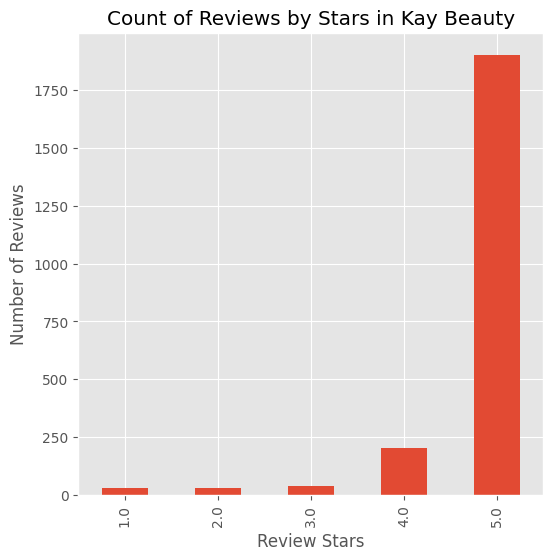

In [67]:
ax = df['review_rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars in Kay Beauty',
          figsize=(6, 6))
ax.set_xlabel('Review Stars')
ax.set_ylabel('Number of Reviews')
plt.show()

# Vader Sentiment Analysis

In [68]:
sia = SentimentIntensityAnalyzer()

In [69]:
# Apply VADER sentiment analysis
df[['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']] = df['review_text'].apply(lambda text: pd.Series(sia.polarity_scores(text)))

In [70]:
df.head()

,product_id,review_text,review_date,review_rating,product_title,Dominant_Topic_Label,vader_neg,vader_neu,vader_pos,vader_compound
0,573572,"Long-lasting, doesn't smudge",2020-03-24 09:43:00,5.0,Kay Beauty Matte Action Lip Liner,Texture,0.000,1.000,0.000,0.0000
1,573181,"I love the smell, consistency, hydrating textu...",2021-03-18 01:48:00,5.0,Kay Beauty Matteinee Matte Lip Crayon Lipstick,Texture,0.000,0.741,0.259,0.6369
2,573181,Amazing shade and glides extremely smooth,2021-02-08 16:35:00,5.0,Kay Beauty Matteinee Matte Lip Crayon Lipstick,Texture,0.000,0.568,0.432,0.5859
3,573181,Shade is beautiful and is matte! Go for the pr...,2021-02-10 10:28:00,5.0,Kay Beauty Matteinee Matte Lip Crayon Lipstick,Texture,0.000,0.540,0.460,0.8550
4,573181,It's a very beautiful brown shade which looks ...,2021-02-15 16:44:00,5.0,Kay Beauty Matteinee Matte Lip Crayon Lipstick,Texture,0.036,0.687,0.277,0.9595


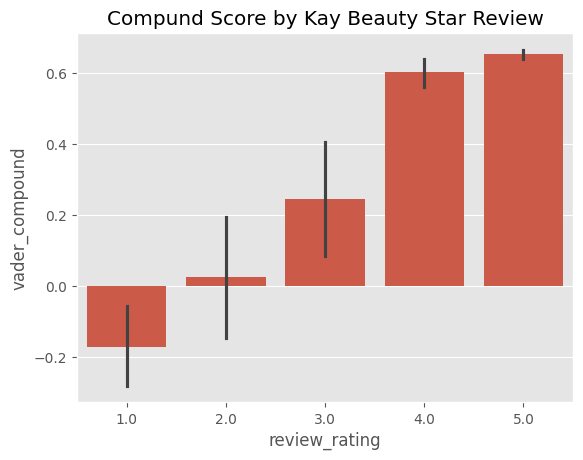

In [71]:
ax = sns.barplot(data=df, x='review_rating', y='vader_compound')
ax.set_title('Compund Score by Kay Beauty Star Review')
plt.show()

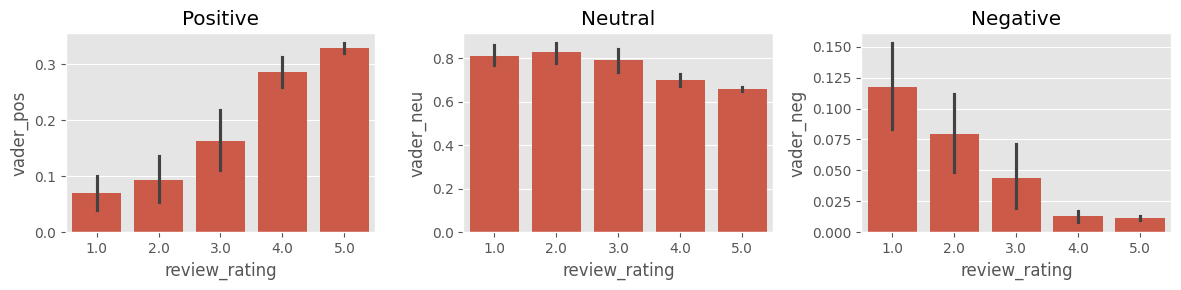

In [72]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=df, x='review_rating', y='vader_pos', ax=axs[0])
sns.barplot(data=df, x='review_rating', y='vader_neu', ax=axs[1])
sns.barplot(data=df, x='review_rating', y='vader_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# RoBERTa Sentiment Analysis

In [73]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [74]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [75]:
# Apply RoBERTa sentiment analysis
df[['roberta_neg', 'roberta_neu', 'roberta_pos']] = df['review_text'].apply(lambda text: pd.Series(polarity_scores_roberta(text)))

In [76]:
df.head()

,product_id,review_text,review_date,review_rating,product_title,Dominant_Topic_Label,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
0,573572,"Long-lasting, doesn't smudge",2020-03-24 09:43:00,5.0,Kay Beauty Matte Action Lip Liner,Texture,0.000,1.000,0.000,0.0000,0.032203,0.607773,0.360024
1,573181,"I love the smell, consistency, hydrating textu...",2021-03-18 01:48:00,5.0,Kay Beauty Matteinee Matte Lip Crayon Lipstick,Texture,0.000,0.741,0.259,0.6369,0.001864,0.014310,0.983826
2,573181,Amazing shade and glides extremely smooth,2021-02-08 16:35:00,5.0,Kay Beauty Matteinee Matte Lip Crayon Lipstick,Texture,0.000,0.568,0.432,0.5859,0.002676,0.047443,0.949881
3,573181,Shade is beautiful and is matte! Go for the pr...,2021-02-10 10:28:00,5.0,Kay Beauty Matteinee Matte Lip Crayon Lipstick,Texture,0.000,0.540,0.460,0.8550,0.001704,0.017706,0.980589
4,573181,It's a very beautiful brown shade which looks ...,2021-02-15 16:44:00,5.0,Kay Beauty Matteinee Matte Lip Crayon Lipstick,Texture,0.036,0.687,0.277,0.9595,0.002236,0.009598,0.988166


In [77]:
def get_sentiment_label(vader_compound, roberta_neg, roberta_neu, roberta_pos):
    # Define thresholds for sentiment labels
    vader_threshold = 0.05
    
    # Determine sentiment label based on VADER compound score
    if vader_compound >= vader_threshold:
        vader_label = 'positive'
    elif vader_compound <= -vader_threshold:
        vader_label = 'negative'
    else:
        vader_label = 'neutral'
    
    # Determine sentiment label based on RoBERTa scores
    roberta_scores = {'negative': roberta_neg, 'neutral': roberta_neu, 'positive': roberta_pos}
    max_sentiment = max(roberta_scores, key=roberta_scores.get)
    
    return vader_label, max_sentiment

# Apply the function to create new columns for sentiment labels
df['vader_sentiment'], df['roberta_sentiment'] = zip(*df.apply(
    lambda row: get_sentiment_label(row['vader_compound'], row['roberta_neg'], row['roberta_neu'], row['roberta_pos']),
    axis=1
))

# Display the first few rows of the DataFrame with the new columns
df.head()

,product_id,review_text,review_date,review_rating,product_title,Dominant_Topic_Label,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,vader_sentiment,roberta_sentiment
0,573572,"Long-lasting, doesn't smudge",2020-03-24 09:43:00,5.0,Kay Beauty Matte Action Lip Liner,Texture,0.000,1.000,0.000,0.0000,0.032203,0.607773,0.360024,neutral,neutral
1,573181,"I love the smell, consistency, hydrating textu...",2021-03-18 01:48:00,5.0,Kay Beauty Matteinee Matte Lip Crayon Lipstick,Texture,0.000,0.741,0.259,0.6369,0.001864,0.014310,0.983826,positive,positive
2,573181,Amazing shade and glides extremely smooth,2021-02-08 16:35:00,5.0,Kay Beauty Matteinee Matte Lip Crayon Lipstick,Texture,0.000,0.568,0.432,0.5859,0.002676,0.047443,0.949881,positive,positive
3,573181,Shade is beautiful and is matte! Go for the pr...,2021-02-10 10:28:00,5.0,Kay Beauty Matteinee Matte Lip Crayon Lipstick,Texture,0.000,0.540,0.460,0.8550,0.001704,0.017706,0.980589,positive,positive
4,573181,It's a very beautiful brown shade which looks ...,2021-02-15 16:44:00,5.0,Kay Beauty Matteinee Matte Lip Crayon Lipstick,Texture,0.036,0.687,0.277,0.9595,0.002236,0.009598,0.988166,positive,positive


# TextBlob Sentiment Analysis

In [78]:
def get_textblob_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0.05:
        return 'positive'
    elif polarity < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to create a new column for TextBlob sentiment labels
df['textblob_sentiment'] = df['review_text'].apply(get_textblob_sentiment)

In [79]:
df.head()

,product_id,review_text,review_date,review_rating,product_title,Dominant_Topic_Label,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,vader_sentiment,roberta_sentiment,textblob_sentiment
0,573572,"Long-lasting, doesn't smudge",2020-03-24 09:43:00,5.0,Kay Beauty Matte Action Lip Liner,Texture,0.000,1.000,0.000,0.0000,0.032203,0.607773,0.360024,neutral,neutral,neutral
1,573181,"I love the smell, consistency, hydrating textu...",2021-03-18 01:48:00,5.0,Kay Beauty Matteinee Matte Lip Crayon Lipstick,Texture,0.000,0.741,0.259,0.6369,0.001864,0.014310,0.983826,positive,positive,positive
2,573181,Amazing shade and glides extremely smooth,2021-02-08 16:35:00,5.0,Kay Beauty Matteinee Matte Lip Crayon Lipstick,Texture,0.000,0.568,0.432,0.5859,0.002676,0.047443,0.949881,positive,positive,positive
3,573181,Shade is beautiful and is matte! Go for the pr...,2021-02-10 10:28:00,5.0,Kay Beauty Matteinee Matte Lip Crayon Lipstick,Texture,0.000,0.540,0.460,0.8550,0.001704,0.017706,0.980589,positive,positive,positive
4,573181,It's a very beautiful brown shade which looks ...,2021-02-15 16:44:00,5.0,Kay Beauty Matteinee Matte Lip Crayon Lipstick,Texture,0.036,0.687,0.277,0.9595,0.002236,0.009598,0.988166,positive,positive,positive


# Drop Numerical Values

In [80]:
# Assuming df is your DataFrame and 'column1', 'column2', etc., are the columns you want to drop
columns_to_drop = ['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg', 'roberta_pos', 'roberta_neu']
df.drop(columns=columns_to_drop, inplace=True)

In [81]:
df.head()

,product_id,review_text,review_date,review_rating,product_title,Dominant_Topic_Label,vader_sentiment,roberta_sentiment,textblob_sentiment
0,573572,"Long-lasting, doesn't smudge",2020-03-24 09:43:00,5.0,Kay Beauty Matte Action Lip Liner,Texture,neutral,neutral,neutral
1,573181,"I love the smell, consistency, hydrating textu...",2021-03-18 01:48:00,5.0,Kay Beauty Matteinee Matte Lip Crayon Lipstick,Texture,positive,positive,positive
2,573181,Amazing shade and glides extremely smooth,2021-02-08 16:35:00,5.0,Kay Beauty Matteinee Matte Lip Crayon Lipstick,Texture,positive,positive,positive
3,573181,Shade is beautiful and is matte! Go for the pr...,2021-02-10 10:28:00,5.0,Kay Beauty Matteinee Matte Lip Crayon Lipstick,Texture,positive,positive,positive
4,573181,It's a very beautiful brown shade which looks ...,2021-02-15 16:44:00,5.0,Kay Beauty Matteinee Matte Lip Crayon Lipstick,Texture,positive,positive,positive


# Aspect-Based Sentiment Analysis

<Figure size 500x500 with 0 Axes>

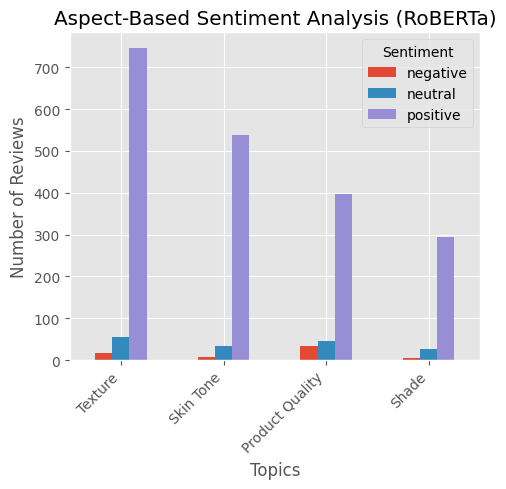

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Dominant_Topic_Label and roberta_sentiment and count the occurrences
topic_sentiment_counts = df.groupby(['Dominant_Topic_Label', 'roberta_sentiment']).size().unstack().fillna(0)

# Order topics by the total number of reviews
topic_order = topic_sentiment_counts.sum(axis=1).sort_values(ascending=False).index

# Reorder the dataframe based on the sorted topics
topic_sentiment_counts = topic_sentiment_counts.loc[topic_order]

# Plotting
plt.figure(figsize=(5, 5))
topic_sentiment_counts.plot(kind='bar', stacked=False, figsize=(5, 5))
plt.title('Aspect-Based Sentiment Analysis (RoBERTa)')
plt.xlabel('Topics')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


# Sentiment Percentages

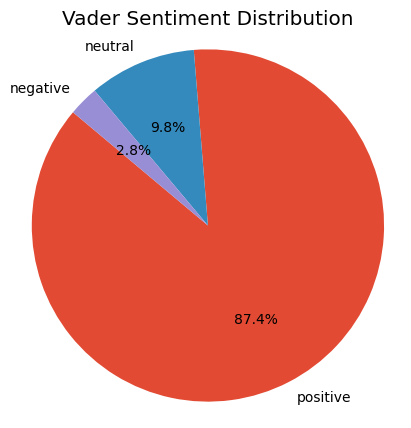

In [83]:
# Group by vader_sentiment and count occurrences
sentiment_counts = df['vader_sentiment'].value_counts()

# Plotting
plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Vader Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

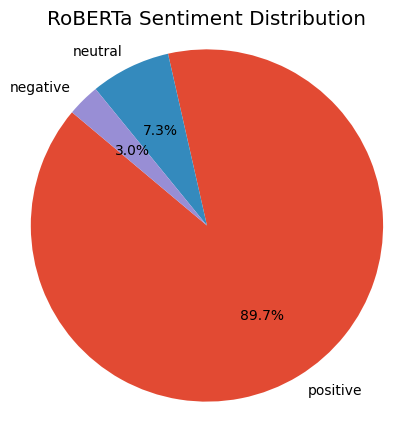

In [84]:
sentiment_counts = df['roberta_sentiment'].value_counts()

# Plotting
plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('RoBERTa Sentiment Distribution')
plt.axis('equal') 
plt.show()

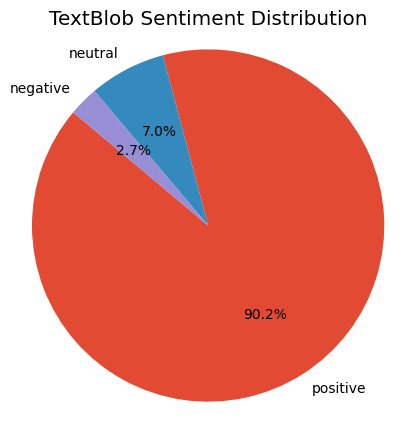

In [85]:
sentiment_counts = df['textblob_sentiment'].value_counts()

# Plotting
plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('TextBlob Sentiment Distribution')
plt.axis('equal') 
plt.show()

In [86]:
# Save the DataFrame to a CSV file
df.to_csv('kay_sentiment.csv', index=False)

# Evaluate Sentiment Analysis methods

In [87]:
# Load the dataset
file_path_labelled = 'kay_manually_annotated.csv'
df_labelled = pd.read_csv(file_path_labelled)

# Preprocess the dataset
df_labelled = df_labelled.apply(lambda x: x.str.strip().str.lower() if x.dtype == "object" else x)

# Encode the labels
label_encoder = LabelEncoder()
df_labelled['manual_annotation'] = label_encoder.fit_transform(df_labelled['manual_annotation'])
df_labelled['vader_sentiment'] = label_encoder.transform(df_labelled['vader_sentiment'])
df_labelled['roberta_sentiment'] = label_encoder.transform(df_labelled['roberta_sentiment'])
df_labelled['textblob_sentiment'] = label_encoder.transform(df_labelled['textblob_sentiment'])

# Prepare ground truth and predictions
y_true = df_labelled['manual_annotation']
y_vader = df_labelled['vader_sentiment']
y_roberta = df_labelled['roberta_sentiment']
y_textblob = df_labelled['textblob_sentiment']

# Function to evaluate models
def evaluate_model(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    return {'Confusion Matrix': cm, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}

# Evaluate each model
vader_results = evaluate_model(y_true, y_vader)
roberta_results = evaluate_model(y_true, y_roberta)
textblob_results = evaluate_model(y_true, y_textblob)

# Display results
print("Vader Results:", vader_results)
print("RoBERTa Results:", roberta_results)
print("TextBlob Results:", textblob_results)

Vader Results: {'Confusion Matrix': array([[29, 13,  8],
       [ 1,  9, 40],
       [ 0,  1, 49]], dtype=int64), 'Accuracy': 0.58, 'Precision': 0.6210418845560038, 'Recall': 0.58, 'F1-Score': 0.5460806697108067}
RoBERTa Results: {'Confusion Matrix': array([[38, 11,  1],
       [ 2, 17, 31],
       [ 0,  1, 49]], dtype=int64), 'Accuracy': 0.6933333333333334, 'Precision': 0.7137150560522207, 'Recall': 0.6933333333333334, 'F1-Score': 0.6743052647777742}
TextBlob Results: {'Confusion Matrix': array([[15, 10, 25],
       [ 4, 11, 35],
       [ 0,  1, 49]], dtype=int64), 'Accuracy': 0.5, 'Precision': 0.579671656204732, 'Recall': 0.5, 'F1-Score': 0.4522301218363564}


In [88]:
# Vader Results: 
# 'Confusion Matrix': array([[29, 13,  8],
#                            [ 1,  9, 40],
#                            [ 0,  1, 49]], 
# 'Accuracy': 0.58, 
# 'Precision': 0.6210418845560038, 
# 'Recall': 0.58, 
# 'F1-Score': 0.5460806697108067

# RoBERTa Results: 
# 'Confusion Matrix': array([[38, 11,  1],
#                            [ 2, 17, 31],
#                            [ 0,  1, 49]],  

# 'Accuracy': 0.6933333333333334, 
# 'Precision': 0.7137150560522207, 
# 'Recall': 0.6933333333333334, 
# 'F1-Score': 0.6743052647777742

# TextBlob Results: 
# 'Confusion Matrix': array([[15, 10, 25],
#                            [ 4, 11, 35],
#                            [ 0,  1, 49]] 
# 'Accuracy': 0.5, 
# 'Precision': 0.579671656204732, 
# 'Recall': 0.5, 
# 'F1-Score': 0.4522301218363564}